# FactoryGuard AI - Exploratory Data Analysis
**Week 1, Days 1-2 - All Team Members**

This notebook performs initial exploratory data analysis on the sensor data.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load Data

In [2]:
# Load sensor data
df = pd.read_csv('../data/raw/sensor_logs.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Dataset shape: (7200, 6)

Columns: ['timestamp', 'machine_id', 'vibration', 'temperature', 'pressure', 'failure']


,timestamp,machine_id,vibration,temperature,pressure,failure
0,2024-01-01 00:00:00,1,0.294,70.01,102.27,0
1,2024-01-01 01:00:00,1,0.292,71.94,102.74,0
2,2024-01-01 02:00:00,1,0.299,75.52,104.29,0
3,2024-01-01 03:00:00,1,0.249,70.22,103.39,0
4,2024-01-01 04:00:00,1,0.317,70.55,103.22,0


## 2. Basic Statistics

In [3]:
print("=== Dataset Summary ===")
print(f"Total records: {len(df):,}")
print(f"Unique machines: {df['machine_id'].nunique()}")
print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nFailure events: {df['failure'].sum()}")
print(f"Failure rate: {(df['failure'].sum() / len(df)) * 100:.3f}%")

=== Dataset Summary ===
Total records: 7,200
Unique machines: 10
Time range: 2024-01-01 00:00:00 to 2024-01-30 23:00:00

Failure events: 30
Failure rate: 0.417%


In [4]:
# Statistical summary
df[['vibration', 'temperature', 'pressure']].describe()

,vibration,temperature,pressure
count,7200.000000,7200.000000,7200.000000
mean,0.407373,70.908260,102.708326
std,0.104226,5.320807,2.217644
min,0.141000,57.890000,92.350000
25%,0.339000,67.850000,101.240000
50%,0.386000,70.100000,103.120000
75%,0.453250,72.520000,104.330000
max,1.099000,101.890000,108.550000


## 3. Missing Values Analysis

In [5]:
print("Missing values:")
print(df.isnull().sum())
print(f"\nMissing percentage: {(df.isnull().sum() / len(df) * 100).round(2)}%")

Missing values:
timestamp      0
machine_id     0
vibration      0
temperature    0
pressure       0
failure        0
dtype: int64

Missing percentage: timestamp      0.0
machine_id     0.0
vibration      0.0
temperature    0.0
pressure       0.0
failure        0.0
dtype: float64%


## 4. Sensor Distributions

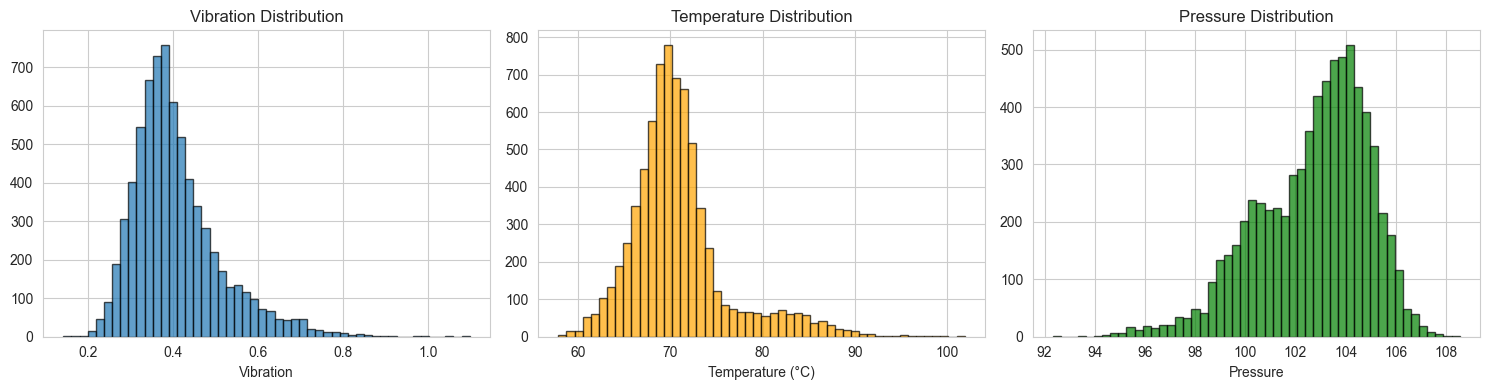

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['vibration'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Vibration Distribution')
axes[0].set_xlabel('Vibration')

axes[1].hist(df['temperature'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Temperature Distribution')
axes[1].set_xlabel('Temperature (°C)')

axes[2].hist(df['pressure'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title('Pressure Distribution')
axes[2].set_xlabel('Pressure')

plt.tight_layout()
plt.show()

## 5. Sensor Correlations

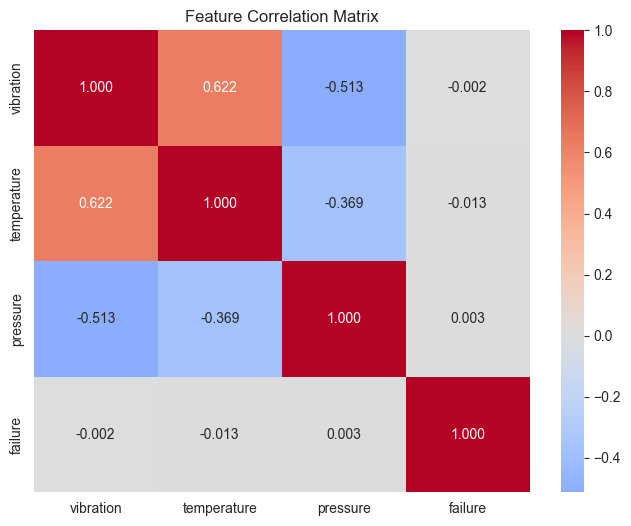

In [7]:
corr = df[['vibration', 'temperature', 'pressure', 'failure']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Feature Correlation Matrix')
plt.show()

## 6. Time Series Plot (Sample Machine)

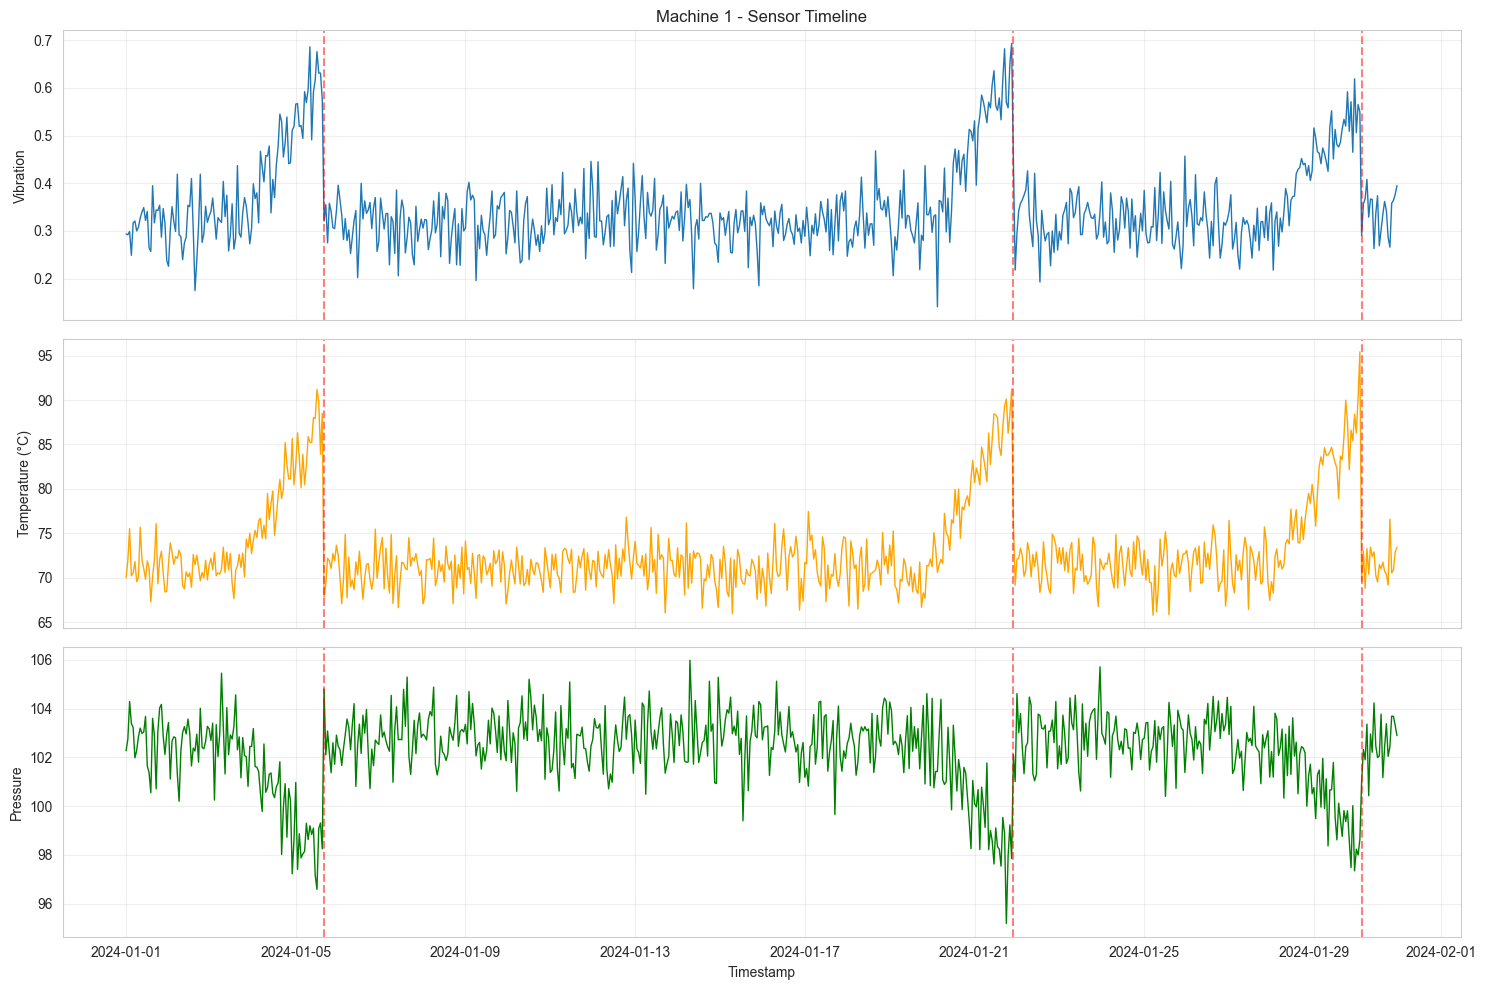

In [8]:
# Plot time series for machine 1
machine_data = df[df['machine_id'] == 1].sort_values('timestamp')

fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

axes[0].plot(machine_data['timestamp'], machine_data['vibration'], linewidth=1)
axes[0].set_ylabel('Vibration')
axes[0].set_title('Machine 1 - Sensor Timeline')
axes[0].grid(True, alpha=0.3)

axes[1].plot(machine_data['timestamp'], machine_data['temperature'], color='orange', linewidth=1)
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(machine_data['timestamp'], machine_data['pressure'], color='green', linewidth=1)
axes[2].set_ylabel('Pressure')
axes[2].set_xlabel('Timestamp')
axes[2].grid(True, alpha=0.3)

# Mark failures
failures = machine_data[machine_data['failure'] == 1]
for ax in axes:
    for fail_time in failures['timestamp']:
        ax.axvline(fail_time, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 7. Next Steps

- ✅ Data loaded successfully
- ✅ Understood data structure and distributions
- 🔄 Proceed to data cleaning (`data_cleaning.py`)
- 🔄 Apply temporal feature engineering (`feature_engineering.py`)